# Praktikum 1: Grundlagen der Numerik

### Differenzenquotienten zur Approximation von Ableitungen

Zur **numerischen Ableitung** einer Funktion $f$ an einer Stelle $x_0 \in D_f$ wird der Grenzwert

$$f'(x_0)=\lim\limits_{h \rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}$$

durch eine Sekantensteigung mit einer positiven Schrittweite $h$ ersetzt. Es gibt (mindestens) zwei Varianten:

<span style="color:green">**Vorwärtsdifferenzenquotient**</span>

$$f'(x_0) \approx \frac{f(x_0+h)-f(x_0)}{h}$$

<span style="color:green">**Zentraler Differenzenquotient**</span>
$$
    f'(x_0) \approx \frac{f(x_0+h)-f(x_0-h)}{2 h}
$$

Die Qualität der Näherung hängt natürlich von der verwendeten Schrittweite $h$ ab.

### Fehler
Indem man $f$ in eine Taylorreihe entwickelt, kann man den Diskretisierungsfehler bestimmen:

$$
    f(x_0+h) = f(x_0) + f'(x_0) \cdot h + a_2 \cdot h^2 + a_3 \cdot h^3 + \ldots, \qquad (a_2 = f''(x_0) / 2 \textrm{ etc.})
$$

Damit lässt sich der Diskretisierungsfehler wie folgt darstellen:   

$$
    \frac{f(x_0+h)-f(x_0)}{h} = f'(x_0) + \color{red}{ h \cdot ( a_2 + a_3 h + \ldots)}
$$

und es folgt, dass der Diskretisierungsfehler beim Vorwärtsdifferenzenquotienten <span style="color:greenlue">etwa proportional zur Schrittweite $h$ ist</span>. 
 
Nebst dem Diskretisierungsfehler gibt es allerdings **Rundungsfehler**. Man kann sich überlegen, dass dieser etwa proportional zum _Kehrwert_ $1/h$ ist. Folglich gibt es eine bezüglich Gesamtfehler optimale Schrittweite $h_*$. Im Folgenden soll diese experimentell ermittelt werden.

In [41]:
import numpy as np
import matplotlib.pyplot as plt

Wir betrachten die Funktion $$f(x) = \cos(x)$$ im Punkt $$x_0=1.$$

In [42]:
f = np.cos # Bestehende (oder selbst definierte) Funktionen können in python an Variablen zugewiesen werden. 
x0 = 1

Wir berechnen nun die Differenzenquotienten mit unterschiedlichen Schrittweiten...

In [43]:
dExact = -np.sin(x0) #  exakter Wert der Ableitung

n = 500  # Anzahl Schrittweiten h für den plot
# h von 10^-16 bis 10^0 (1)
h = np.logspace(-16, 0, n)

# Auftrag 1: Quotienten berechnen aus der gegebenen Formel (siehe oben)
# Exact : genaue ableitung von cosinuns -> -sinus
# danach unten , die annäherung der ableitung, ursurngsfunktion (also cos, aber mit x0 plus h, nicht nur x0)
# nachher das exact abziehen, damit man den fehler bekommt, nicht nur den wert

vorwärtsQ = (np.cos(x0 + h) - np.cos(x0)) / h # Vorwärtsifferenzenquotienten 
zentrDiffQ = (np.cos(x0 + h) - np.cos(x0 - h)) / (2 * h) # zentrale Differenzenquotienten 
errD1 =  np.abs(vorwärtsQ - dExact) #exakter Wert
errD2 =  np.abs(zentrDiffQ - dExact) #exakter Wert

#plot folgt weiter unten

...und erstellen einen doppelt-logarithmischen plot der soeben berechneten Fehler. (Absolutwerte des Fehlers verwenden, negative Werte lassen sich nicht logarithmisch darstellen!)

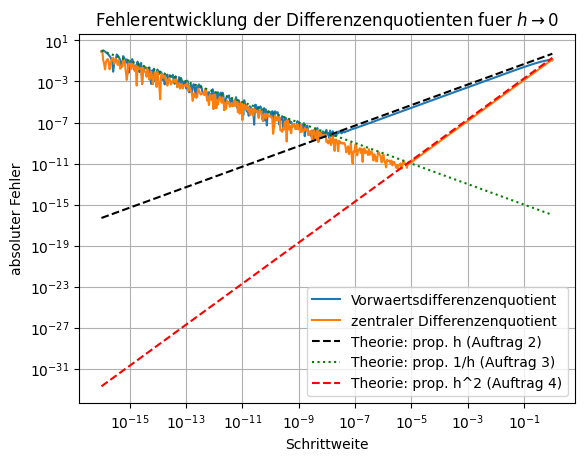

In [44]:
plt.loglog(h, np.abs(errD1), label='Vorwaertsdifferenzenquotient')
plt.loglog(h, np.abs(errD2), label='zentraler Differenzenquotient')

plt.xlabel('Schrittweite')
plt.ylabel('absoluter Fehler')
plt.title(r'Fehlerentwicklung der Differenzenquotienten fuer $h \to 0$')


# loglog erklärung:
# kommt aus einer liste/array, je einen für x werte und y werte
# für prüfung:
# plt.loglog(XWERTE, YWERTE, "STYLE"(siehe unten), label='hier etwas schreiben')

#Cheatsheet für prüfung:
#ürzel,Bedeutung,Typische Verwendung im Praktikum
#'--k',"Schwarz, gestrichelt"
#'--r',"Rot, gestrichelt"
#':g',"Grün, gepunktet"
#'-b',"Blau, durchgezogen"

#Aufträge
# Auftrag 2: Gerade proportional zu h


# hätte abstand: plt.loglog(h,  h, '--k', label='Theorie: prop. h (Auftrag 2)')
#besser:
plt.loglog(h, 0.5 * h, '--k', label='Theorie: prop. h (Auftrag 2)')

# Auftrag 3: Gerade proportional zu 1/h
#plt.loglog(h, 1 / h, ':g', label='Theorie: prop. 1/h (Auftrag 3)')
plt.loglog(h, 1e-16 / h, ':g', label='Theorie: prop. 1/h (Auftrag 3)') # anstatt 1, nehmen wir 1e-16 um den plot nicht zu weit zu strecken


# Auftrag 4: 
# erste gleichung minus 2.
#fx0 fällt weg
#f mit hhoch2 fällt weg

# übrig bleibt 2mal teilmit hhoch3
# teilen durch h
#also proportional zu  h quadrat

#Gerade proportional zu h^2¨
plt.loglog(h, 0.2 * h**2, '--r', label='Theorie: prop. h^2 (Auftrag 4)')



plt.legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

## Aufträge

1. Können Sie in dem obigen plot die Einflüsse von Diskretisierungs- und Rundungsfehler identifizieren?


2. Oben wurde behauptet, dass der *Diskretisierungsfehler* des Vorwärtsdifferenzenquotienten proportional zu $h$ sein müsste. Können Sie diese Behauptung verifizieren, indem Sie dem obigen plot eine passende Gerade hinzufügen?


3. Können Sie auf dieselbe Art verifizieren, dass der *Rundungsfehler* etwa proportional zu $1/h$ verläuft? Was ist etwa die Proportionalitätskonstante?


4. Wenn man die Taylorentwicklung in beide Richtungen durchführt:

\begin{eqnarray*}
   f(x_0 + h) &=& f(x_0) + f'(x_0) \cdot h + a_2 \cdot h^2 + a_3 \cdot h^3 + \ldots \\
   f(x_0 - h) &=& f(x_0) - f'(x_0) \cdot h + a_2 \cdot h^2 - a_3 \cdot h^3 + \ldots \\
\end{eqnarray*}

so kann man etwas über den Diskretisierungsfehler des zentralen Differenzenquotienten lernen:

$$
    \frac{f(x_0 + h) - f(x_0 - h)}{2 h} = \ldots
$$

Können Sie dies ebenfalls überprüfen, indem Sie dem plot eine weitere passende Gerade hinzufügen?


## Schlussbemerkung
In typischen Anwendungen (z.B. **Finite Differenzen**) ist die Schrittweite nicht durch den Rundungsfehler sondern vielmehr durch den Rechenaufwand oder Speicherplatzbedarf nach unten begrenzt. Bei gleicher Schrittweite liefert aber i.d.R. der zentrale Differenzenquotient die bessere Näherung und wird daher bevorzugt. 